# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="Tennis_Windows_x86_64/Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [6]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.0
Score (max over agents) from episode 2: 0.0
Score (max over agents) from episode 3: 0.0
Score (max over agents) from episode 4: 0.10000000149011612
Score (max over agents) from episode 5: 0.0


When finished, you can close the environment.

In [7]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

### 5. Import Required Additional Modules and Create Agents

In [2]:
from unityagents import UnityEnvironment
import numpy as np
import random
import time
import torch
from collections import deque
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

from ddpg_agent import Agent

env = UnityEnvironment(file_name='Tennis_Windows_x86_64/Tennis.exe')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


In [3]:
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print(f'There are {states.shape[0]} agents. Each observes a state with length: {state_size}')
print(f'The state for the first agent looks like: {states[0]}')

agents = Agent(num_agents=num_agents, state_size=state_size, action_size=action_size, random_seed=time.time())
print(f'{num_agents} agents created')

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]
2 agents created


### 6. Train the Agent with DDPG

Episode 100	100-Ep. Avg.: 0.00	Max Ep. Score: 0.10
Episode 200	100-Ep. Avg.: 0.00	Max Ep. Score: 0.00
Episode 300	100-Ep. Avg.: 0.00	Max Ep. Score: 0.00
Episode 400	100-Ep. Avg.: 0.00	Max Ep. Score: 0.00
Episode 500	100-Ep. Avg.: 0.00	Max Ep. Score: 0.10
Episode 600	100-Ep. Avg.: 0.00	Max Ep. Score: 0.10
Episode 700	100-Ep. Avg.: 0.00	Max Ep. Score: 0.09
Episode 800	100-Ep. Avg.: 0.00	Max Ep. Score: 0.10
Episode 900	100-Ep. Avg.: 0.00	Max Ep. Score: 0.10
Episode 1000	100-Ep. Avg.: 0.01	Max Ep. Score: 0.10
Episode 1100	100-Ep. Avg.: 0.01	Max Ep. Score: 0.10
Episode 1200	100-Ep. Avg.: 0.01	Max Ep. Score: 0.10
Episode 1300	100-Ep. Avg.: 0.00	Max Ep. Score: 0.10
Episode 1400	100-Ep. Avg.: 0.03	Max Ep. Score: 0.10
Episode 1500	100-Ep. Avg.: 0.01	Max Ep. Score: 0.10
Episode 1600	100-Ep. Avg.: 0.04	Max Ep. Score: 0.20
Episode 1700	100-Ep. Avg.: 0.06	Max Ep. Score: 0.20
Episode 1800	100-Ep. Avg.: 0.09	Max Ep. Score: 0.30
Episode 1900	100-Ep. Avg.: 0.10	Max Ep. Score: 0.30
Episode 2000	100-Ep. 

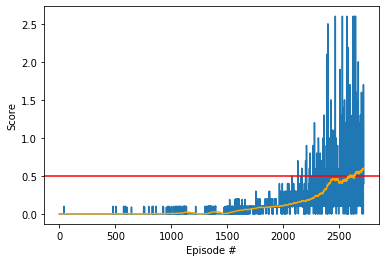

In [4]:
def ddpg(n_episodes=6000, max_t=1000):
    scores_deque = deque(maxlen=100)
    scores = []
    avgs = []
    max_ep_score = float('-inf')
    found_5p0 = False
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        agents.reset()
        score = np.zeros(num_agents)
        for t in range(max_t):
            actions = agents.act(states)                   # adds noise by default
            env_info = env.step(actions)[brain_name]       # send the actions to the environment
            next_states = env_info.vector_observations     # get next state (for each agent)
            rewards = env_info.rewards                     # get reward (for each agent)
            dones = env_info.local_done                    # see if episode has finished
            agents.step(states, actions, rewards, next_states, dones)
            score += rewards
            states = next_states
            if np.any(dones):                              # exit loop if any episode finished
                break
        ep_score = np.max(score)                           # episode score is max of the two agents
        if ep_score > max_ep_score:
            max_ep_score = ep_score
        scores_deque.append(ep_score)                      # collect episode score for moving window average
        scores.append(ep_score)
        avg_win = np.mean(scores_deque)
        avgs.append(avg_win)
        if avg_win > 0.5 and found_5p0 == False:
            found_5p0 = True
            print(f'\n** Passed 0.5 at episode {i_episode} **')
        print(f'\rEpisode {i_episode}\t100-Ep. Avg.: {avg_win:.2f}\tMax Ep. Score: {max_ep_score:.2f}', end='')
        if i_episode % 100 == 0 or avg_win > 0.6:
            torch.save(agents.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agents.critic_local.state_dict(), 'checkpoint_critic.pth')
            print(f'\rEpisode {i_episode}\t100-Ep. Avg.: {avg_win:.2f}\tMax Ep. Score: {max_ep_score:.2f}')
            max_ep_score = float('-inf')
        if avg_win > 0.6:
            break
    return scores, avgs

scores, avgs = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.axhline(y=0.5, color='r')
plt.plot(np.arange(1, len(avgs)+1), avgs, color='orange')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 7. Watch the Agent

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import random
import time
import torch
from collections import deque

from ddpg_agent import Agent

env = UnityEnvironment(file_name='Tennis_Windows_x86_64/Tennis.exe')
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
env_info = env.reset(train_mode=True)[brain_name]
num_agents = len(env_info.agents)
action_size = brain.vector_action_space_size
states = env_info.vector_observations
state_size = states.shape[1]

# load the weights from files
agents = Agent(num_agents=num_agents, state_size=state_size, action_size=action_size, random_seed=time.time())
agents.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
agents.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


In [2]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
agents.reset()
states = env_info.vector_observations

cur_score = 0  # initialize the score
scores = np.zeros(num_agents)
while True:
    actions = agents.act(states)                   # adds noise by default
    env_info = env.step(actions)[brain_name]       # send the actions to the environment
    next_states = env_info.vector_observations     # get next state (for each agent)
    rewards = env_info.rewards                     # get reward (for each agent)
    dones = env_info.local_done                    # see if episode has finished
    agents.step(states, actions, rewards, next_states, dones)
    scores += rewards
    states = next_states
    cur_score = np.max(scores)
    if cur_score > 0.6:                            # exit loop if goal reached
        break
    
print(f'Score: {cur_score}')

Score: 0.6600000113248825
